<a href="https://colab.research.google.com/github/Anantbir-S/AER850_Project2/blob/main/More_Progress_with_Hyperparameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
Found 1942 images belonging to 3 classes.
Found 431 images belonging to 3 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


61/61 ━━━━━━━━━━━━━━━━━━━━ 1102s 16s/step - accuracy: 0.5439 - loss: 2.4350 - val_accuracy: 0.4037 - val_loss: 2.3296 - learning_rate: 5.0000e-05
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.6415 - loss: 1.9462 - val_accuracy: 0.4037 - val_loss: 2.1706 - learning_rate: 5.0000e-05
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.6661 - loss: 1.8673 - val_accuracy: 0.4965 - val_loss: 2.0318 - learning_rate: 5.0000e-05
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.6704 - loss: 1.7743 - val_accuracy: 0.6056 - val_loss: 1.8557 - learning_rate: 5.0000e-05
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.6707 - loss: 1.7098 - val_accuracy: 0.5870 - val_loss: 1.7732 - learning_rate: 5.0000e-05
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.7147 - loss: 1.6239 - val_accuracy: 0.6265 - val_loss: 1.7017 - learning_rate: 5.0000e-05
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.7095 - loss: 1

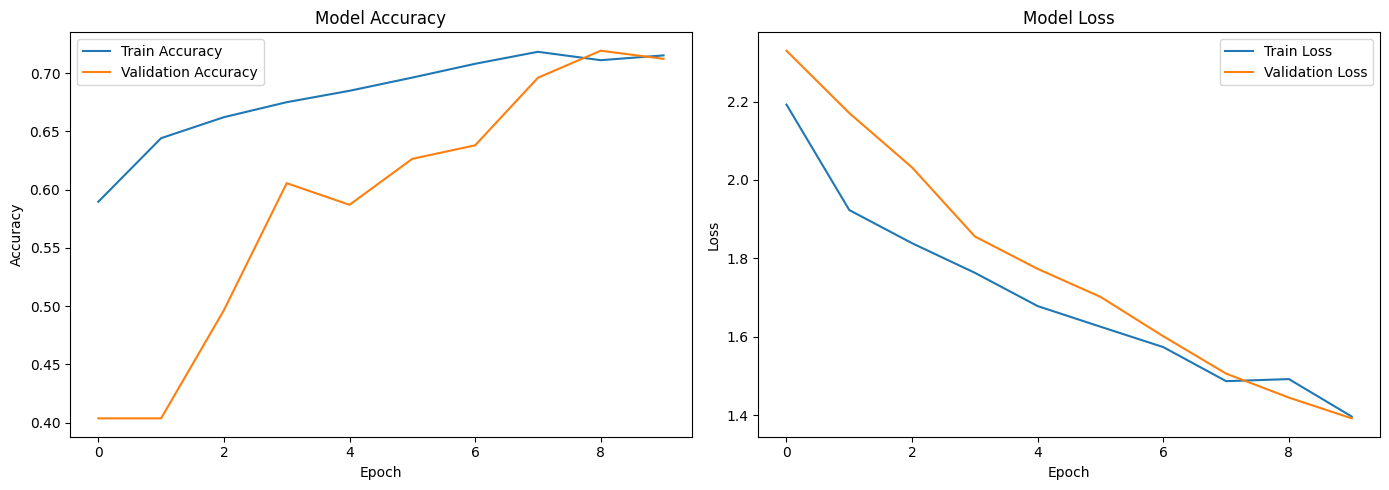

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define image dimensions
input_image_shape = (500, 500, 3)

# Define base directory
base_dir = '/content/drive/MyDrive/AER850 Project 2/Project 2 Data/Data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')

# Simplify augmentation to align closer with validation set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Create image data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(500, 500),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(500,500),
    batch_size=32,
    class_mode='categorical'
)

# Create the model
model = Sequential([
    Input(shape=input_image_shape),
    Conv2D(32, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.2),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.2),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.2),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.4),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.2),

    Dense(3, activation='softmax')
    Dropout(0.4)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.00005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[early_stopping, reduce_lr]
)

# Plot training and validation accuracy/loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()